In [1]:
# import the necessary libraries that we will need on the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

**2. Loading libraries and importing data**

In [2]:
df=pd.read_csv("heart.csv")  # read the dataset.
df.head()  # display the first five rows of the dataset.
#print(df.to_string())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Smoking,BMI,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,Yes,16.60,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,No,20.34,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,Yes,26.58,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,No,24.21,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,No,23.71,0


In [3]:
df.shape

(1025, 16)

In [4]:
df.dtypes # checking the dataset's type.

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
Smoking      object
BMI         float64
target        int64
dtype: object

In [5]:
df.target.value_counts() #the total number of the datasets that have heart disease and the same for people that not have heart disease. 

1    526
0    499
Name: target, dtype: int64

In [6]:
df[df.sex == 0].target.value_counts()  # count the number of females that have and not have heart disease.

1    226
0     86
Name: target, dtype: int64

In [7]:
df[df.sex == 1].target.value_counts()  # count the number of males that have and not have  heart disease

0    413
1    300
Name: target, dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,BMI,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,29.093639,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,6.558601,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.690000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,24.800000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,28.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,32.610000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,75.820000,1.000000


**3. Data cleaning:**

In [10]:
df["Smoking"] = df["Smoking"].map({"Yes": 1, "No": 0})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Smoking,BMI,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,1,16.60,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,20.34,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1,26.58,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,24.21,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,23.71,0


In [11]:
df=df.rename(columns={'sex':'gender','cp':'chest pain type','trestbps':'blood pressure','chol':'cholestoral','fbs':'blood sugar','restecg':'electrocardiographic','thalach':'maximum heart rate','exang':'exercise induced','oldpeak':'ST depression','ca':'num of major vessels','thal':'thalassemia','BMI':'Body math'},inplace= False)
#we rename the name of some columns to be clear enough.


In [12]:
df.isnull().sum()  #check if there are null values or not.
#There is no missing values in this dataset!

age                     0
gender                  0
chest pain type         0
blood pressure          0
cholestoral             0
blood sugar             0
electrocardiographic    0
maximum heart rate      0
exercise induced        0
ST depression           0
slope                   0
num of major vessels    0
thalassemia             0
Smoking                 0
Body math               0
target                  0
dtype: int64

In [13]:
df=df.dropna() #drope missing values on datasets if there are
df

,age,gender,chest pain type,blood pressure,cholestoral,blood sugar,electrocardiographic,maximum heart rate,exercise induced,ST depression,slope,num of major vessels,thalassemia,Smoking,Body math,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,1,16.60,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,20.34,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1,26.58,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,24.21,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,23.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,24.21,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,22.60,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,25.06,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,25.82,1


In [14]:
df.duplicated().sum()# we here just count the number of duplicates values on dataset .

3

In [15]:
df = df.drop_duplicates()  # we just drope the duplicates values in the datasets.
df.shape

(1022, 16)

In [16]:
df=df.drop(['exercise induced','num of major vessels'],axis=1)  # drope unnecessary columns on dataset because it don,t affect the result.

In [17]:
df.head()

,age,gender,chest pain type,blood pressure,cholestoral,blood sugar,electrocardiographic,maximum heart rate,ST depression,slope,thalassemia,Smoking,Body math,target
0,52,1,0,125,212,0,1,168,1.0,2,3,1,16.60,0
1,53,1,0,140,203,1,0,155,3.1,0,3,0,20.34,0
2,70,1,0,145,174,0,1,125,2.6,0,3,1,26.58,0
3,61,1,0,148,203,0,1,161,0.0,2,3,0,24.21,0
4,62,0,0,138,294,1,1,106,1.9,1,2,0,23.71,0


<Figure size 720x720 with 0 Axes>

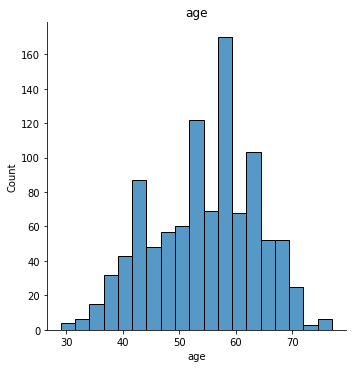

<Figure size 720x720 with 0 Axes>

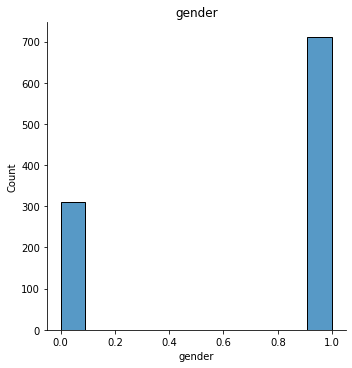

<Figure size 720x720 with 0 Axes>

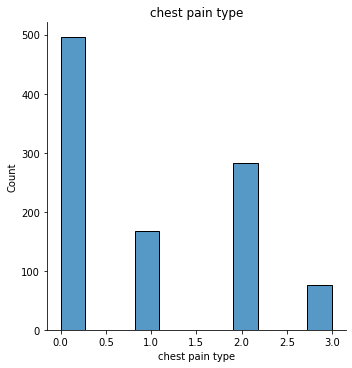

<Figure size 720x720 with 0 Axes>

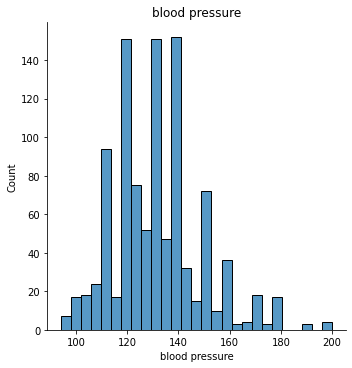

<Figure size 720x720 with 0 Axes>

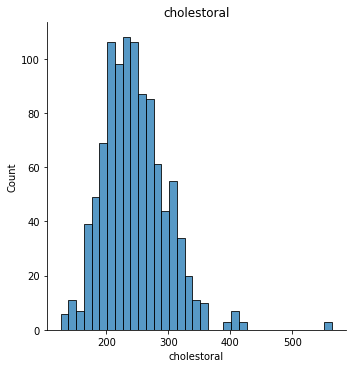

<Figure size 720x720 with 0 Axes>

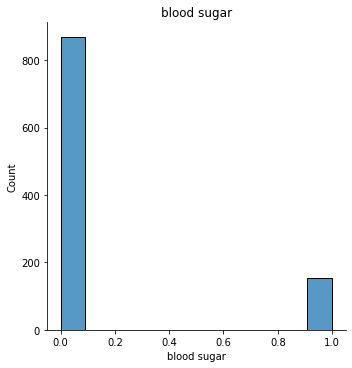

<Figure size 720x720 with 0 Axes>

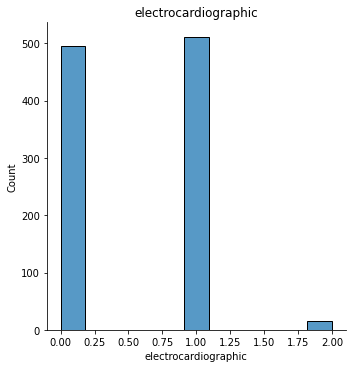

<Figure size 720x720 with 0 Axes>

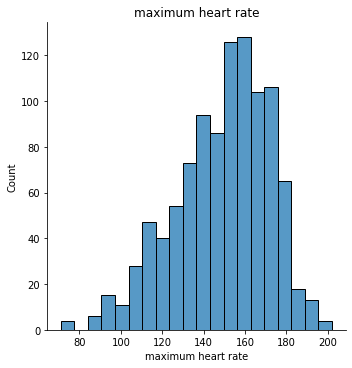

<Figure size 720x720 with 0 Axes>

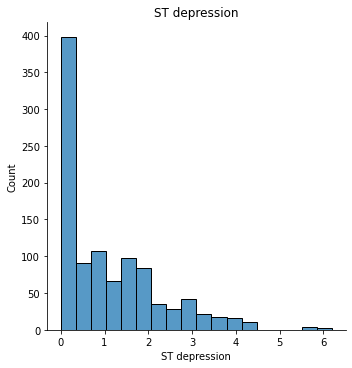

<Figure size 720x720 with 0 Axes>

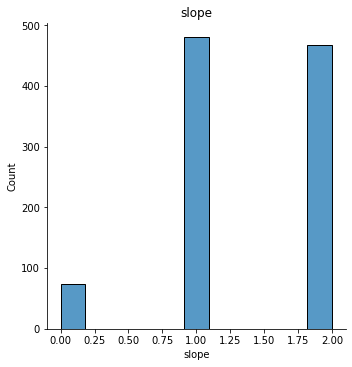

<Figure size 720x720 with 0 Axes>

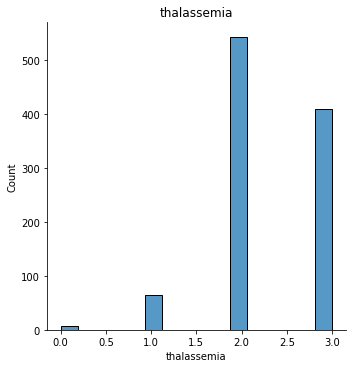

<Figure size 720x720 with 0 Axes>

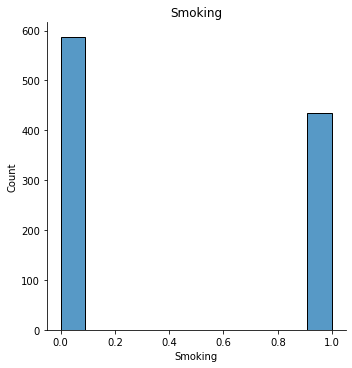

<Figure size 720x720 with 0 Axes>

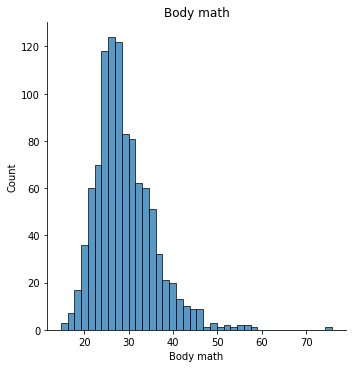

<Figure size 720x720 with 0 Axes>

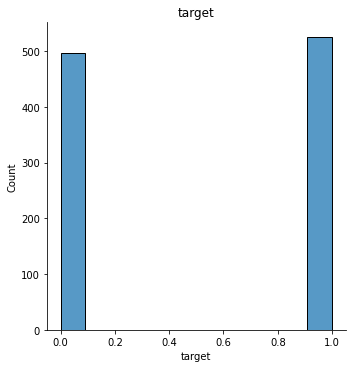

In [18]:
for f in df:
     plt.figure(figsize = (10,10))
     sns.displot(df[f])
     plt.title(f)
     plt.show();
# check if there are outliers on dataset or not using displot 

In [19]:
def rem_outlier(df, feature):
    lower_bound = df[feature].mean() - 3*df[feature].std()
    upper_bound = df[feature].mean() + 3*df[feature].std()
    
    df.loc[df[feature] < lower_bound , feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound
   # creating function to remove columns that have outliers values.

In [20]:
for f in ['blood pressure', 'cholestoral','Body math']:
    rem_outlier(df, f) 
    # here we just call function remove outliers to delete the columns that we highlighted in the for loop.   

<Figure size 720x720 with 0 Axes>

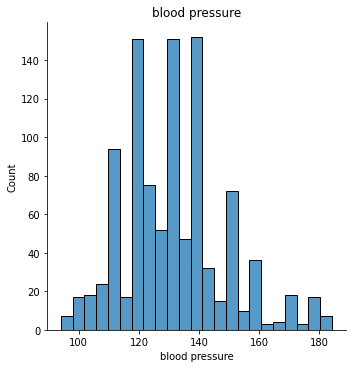

<Figure size 720x720 with 0 Axes>

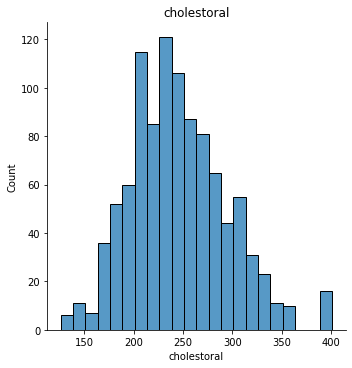

<Figure size 720x720 with 0 Axes>

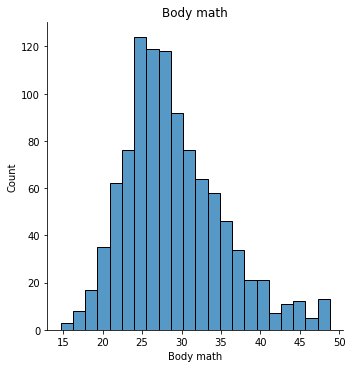

In [21]:
for f in ['blood pressure','cholestoral','Body math']:
     plt.figure(figsize = (10,10))
     sns.displot(df[f])
     plt.title(f)
     plt.show();
     #we checking the columns that have some outliers (blood pressure)(cholestoral) if are clean now or not after remove outliers.



```
```

4. **Pandas’** **aggregate** **functions**

In [22]:
data=df.groupby('gender')['cholestoral','blood pressure','Body math'].aggregate(['min','mean','max'])
data  # we can see the cholestoral's min,max and mean for females are greater than males.
      # the blood suger's min and max valuse are equal in males and females but the blood's mean in females are greater than the males.
      # the Body math's mean and min in females is greater than males. 

<ipython-input-22-120d77c55cb0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=df.groupby('gender')['cholestoral','blood pressure','Body math'].aggregate(['min','mean','max'])


cholestoral                         blood pressure              \
               min        mean         max            min        mean   
gender                                                                  
0            141.0  259.740390  400.943168           94.0  133.543265   
1            126.0  239.237693  353.000000           94.0  130.669081   

                   Body math                        
               max       min       mean        max  
gender                                              
0       184.238834     17.75  29.054820  48.799657  
1       184.238834     14.69  29.007141  48.799657

In [23]:
dat=df.groupby('target')['age','blood pressure','maximum heart rate','cholestoral'].aggregate(['min','mean','max','std'])
dat  # we select this columns and grouped by target to calculate the value of min,max,mean and std .
    # after implements this operation we can see the people that have heart disease and other columns that cause that disease.

<ipython-input-23-e9579c3b7100>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dat=df.groupby('target')['age','blood pressure','maximum heart rate','cholestoral'].aggregate(['min','mean','max','std'])


age                          blood pressure                          \
       min       mean max       std            min        mean         max   
target                                                                       
0       35  56.581489  77  7.913972          100.0  133.953062  184.238834   
1       29  52.428571  76  9.630241           94.0  129.262857  180.000000   

                  maximum heart rate                             cholestoral  \
              std                min        mean  max        std         min   
target                                                                         
0       18.067609                 71  139.030181  195  22.554886       131.0   
1       16.122487                 96  158.558095  202  19.104747       126.0   

                                           
              mean         max        std  
target                                     
0       251.244672  400.943168  49.300570  
1       240.016493  400.943168  48.278476

In [24]:
daf=df.groupby('chest pain type')['age','target','gender'].aggregate(['mean','std'])
daf
  # we select some columns and grouped by(chest pain type) and perform do operations like mean and std

<ipython-input-24-af0596287026>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daf=df.groupby('chest pain type')['age','target','gender'].aggregate(['mean','std'])


age              target              gender          
                      mean       std      mean       std      mean       std
chest pain type                                                             
0                55.800403  8.320018  0.245968  0.431094  0.731855  0.443441
1                51.245509  9.429170  0.802395  0.399390  0.658683  0.475578
2                53.558304  9.385327  0.770318  0.421373  0.618375  0.486646
3                55.973684  9.784305  0.671053  0.472953  0.828947  0.379057

In [25]:
dar=df.groupby('blood sugar').aggregate({'gender':'count','age':['min','max','mean']})

dar  # we calculate the count of gender and the age 

gender age               
             count min max       mean
blood sugar                          
0              869  29  77  53.988493
1              153  42  71  57.058824

In [26]:
daw=df.groupby('target').aggregate(['count','mean','std'])
daw   # we calculate the count,mean and std of target according to all columns in the dataset.

age                      gender                     chest pain type  \
       count       mean       std  count      mean       std           count   
target                                                                         
0        497  56.581489  7.913972    497  0.826962  0.378661             497   
1        525  52.428571  9.630241    525  0.571429  0.495344             525   

                           blood pressure  ...     slope thalassemia  \
            mean       std          count  ...       std       count   
target                                     ...                         
0       0.478873  0.902537            497  ...  0.568797         497   
1       1.377143  0.946393            525  ...  0.590289         525   

                           Smoking                     Body math             \
            mean       std   count      mean       std     count       mean   
target                                                                        
0       2.539235  0.686102     497  0.430584  0.495657       497  29.190537   
1       2.120000  0.469367     525  0.420952  0.494183       525  28.861770   

                  
             std  
target            
0       6.477142  
1       6.041552  

[2 rows x 39 columns]

In [27]:
ddt=df.groupby('Smoking').aggregate({'target':'count','maximum heart rate':['min','max','mean']})
ddt   # the number ofpeople who smoking and the age that is affect from this.

target maximum heart rate                 
         count                min  max        mean
Smoking                                           
0          587                 71  202  149.008518
1          435                 71  202  149.133333

**5**. **Data** **visualization**

In [28]:
df.head()

,age,gender,chest pain type,blood pressure,cholestoral,blood sugar,electrocardiographic,maximum heart rate,ST depression,slope,thalassemia,Smoking,Body math,target
0,52,1,0,125.0,212.0,0,1,168,1.0,2,3,1,16.60,0
1,53,1,0,140.0,203.0,1,0,155,3.1,0,3,0,20.34,0
2,70,1,0,145.0,174.0,0,1,125,2.6,0,3,1,26.58,0
3,61,1,0,148.0,203.0,0,1,161,0.0,2,3,0,24.21,0
4,62,0,0,138.0,294.0,1,1,106,1.9,1,2,0,23.71,0


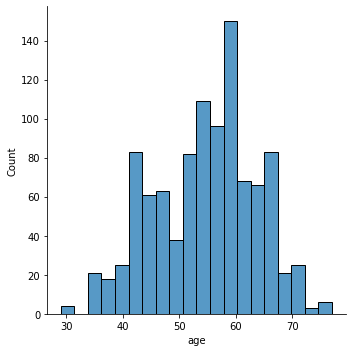

In [29]:
sns.displot(df['age'],bins=20)
plt.show()
# the average of age in dataset is between 40 to 68.

([<matplotlib.patches.Wedge at 0x7fb33a723c10>,
 [Text(-0.9517028041603282, 1.3478730550587354, 'Male'),
  Text(0.9517029303573062, -1.3478729659538826, 'Female')],
 [Text(-0.519110620451088, 0.7352034845774919, '69.6%'),
  Text(0.5191106892858033, -0.7352034359748449, '30.4%')])

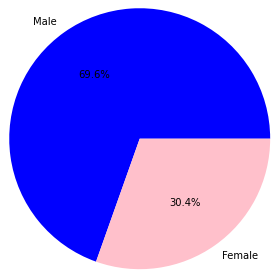

In [30]:
plt.pie(df['gender'].value_counts(), labels=['Male','Female'], colors=['blue','pink'], autopct='%1.1f%%', radius=1.5)
#We can see that 30% of people were female and 70% were male.

In [31]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.448140900195696


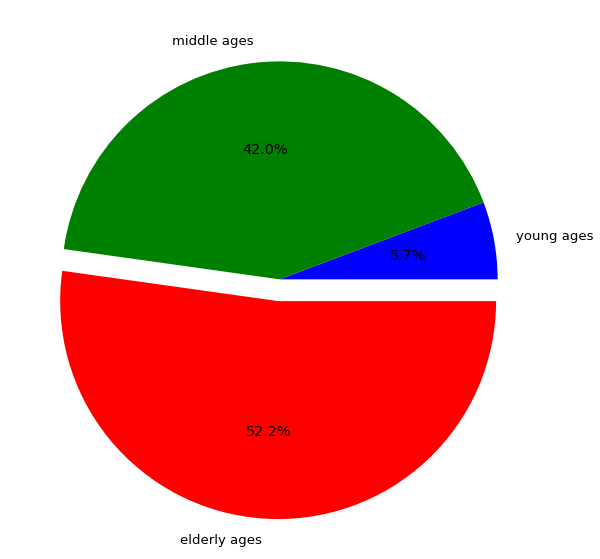

In [32]:
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

colors = ['blue','green','Red']
explode = [0,0,0.1]
plt.figure(figsize=(10,8))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

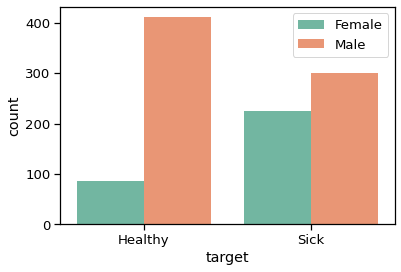

In [33]:
fig = sns.countplot(x = 'target', data = df, hue = 'gender', palette='Set2')
fig.set_xticklabels(labels=['Healthy', 'Sick'])
plt.legend(['Female', 'Male'])

**point**:We can see that there are more man in this study, so both healthy and sick male are more than females.

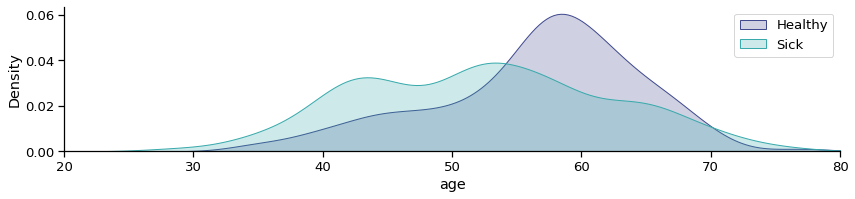

In [34]:
fig = sns.FacetGrid(df, hue="target",aspect=4, palette='mako')
fig.map(sns.kdeplot,'age',shade= True)
fig.set(xlim=(20,80))
plt.legend(labels=['Healthy' , 'Sick'])
#see a peak of healthy people at 60. Let's see if age is a factor in heart disease:

  **point**:We can see that most of the people show their heart disease between age 40- more than 60. Also

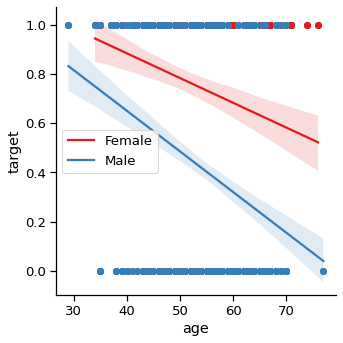

In [35]:
sns.lmplot(x='age',y='target',data=df, hue='gender', legend=False,  palette='Set1')
plt.legend(['Female', 'Male'])

**point**:We can see that women tend to have more heart disease.

[Text(0, 0, 'pain type 0'),
 Text(0, 0, 'pain type 1'),
 Text(0, 0, 'pain type 2'),
 Text(0, 0, 'pain type 3')]

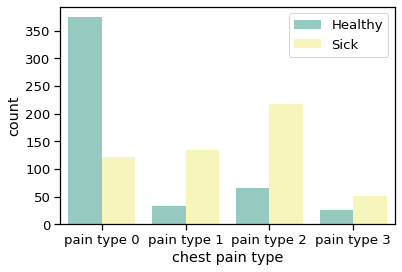

In [36]:
fig = sns.countplot(x = 'chest pain type', data = df, hue = 'target', palette='Set3')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'])
# the people who have heart diseas is that have chest pain type (atypical angina / non angina pectoris / asymtomatic) more that the others that don,t have.

**point**:# the people who have heart disease is that have chest pain type (atypical angina / non angina pectoris / asymtomatic) more that the others that don,t have.

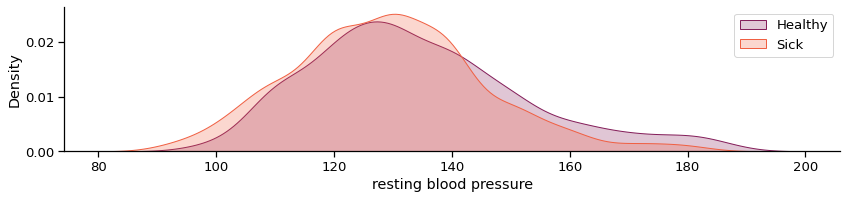

In [37]:
fig = sns.FacetGrid(df, hue="target",aspect=4, palette='rocket')
fig.map(sns.kdeplot,'blood pressure',shade= True)
plt.legend(labels=['Healthy' , 'Sick'])
fig.set(xlabel = 'resting blood pressure')
# normal blood pressure is 120.

**point**: # It seems that people with heart problems generally had slighly lower blood pressure than normal people.

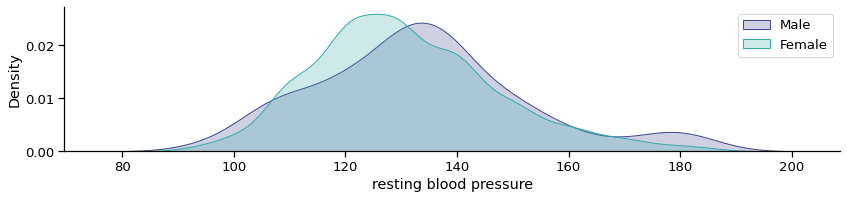

In [38]:
fig = sns.FacetGrid(df, hue="gender",aspect=4, palette='mako')
fig.map(sns.kdeplot,'blood pressure',shade= True)
plt.legend(labels=['Male' , 'Female'])
fig.set(xlabel = 'resting blood pressure')

**point**:Women have lower resting blood pressure comparing to men. For women is around 120 while for men is a little less than 140.

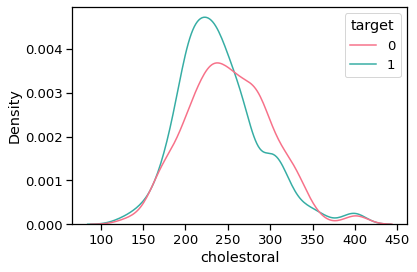

In [39]:
sns.kdeplot(data=df, x='cholestoral', hue='target',palette="husl")

**point**: people who have a big cholestoral value is have heart disease.

[Text(0, 0, 'low blood sugar'), Text(0, 0, 'high blood sugar')]

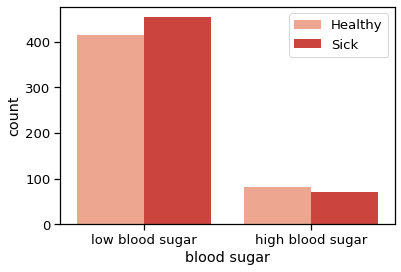

In [40]:
fig = sns.countplot(x = 'blood sugar', data = df, hue = 'target', palette='Reds')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'low blood sugar','high blood sugar'])

**point**:We see that most of the healthy and sick people have blood sugar less than 120

[Text(0, 0, 'normal'),
 Text(0, 0, 'abnormality'),
 Text(0, 0, 'ventricular hypertrophy')]

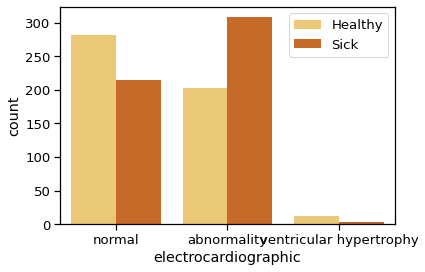

In [41]:
fig = sns.countplot(x = 'electrocardiographic', data = df, hue = 'target', palette='YlOrBr')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'normal','abnormality','ventricular hypertrophy'])

**point**:abnormality seems to be more dangerous as a lot of sick people have that.

[Text(0, 0, 'healthy'), Text(0, 0, 'sick')]

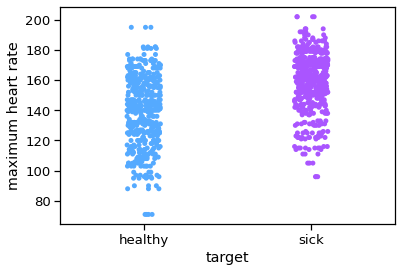

In [42]:
fig = sns.stripplot(data=df, x='target', y='maximum heart rate', palette='cool')
fig.set_xticklabels(labels=['healthy','sick'])

**point**: Sick people seem to have higher maximum heart rate values.

[Text(0, 0, 'no Smoking'), Text(0, 0, 'with Smoking')]

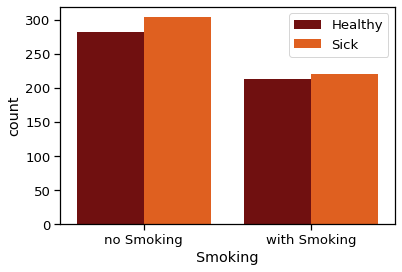

In [43]:
fig = sns.countplot(x = 'Smoking', data = df, hue = 'target',palette='gist_heat')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'no Smoking','with Smoking'])

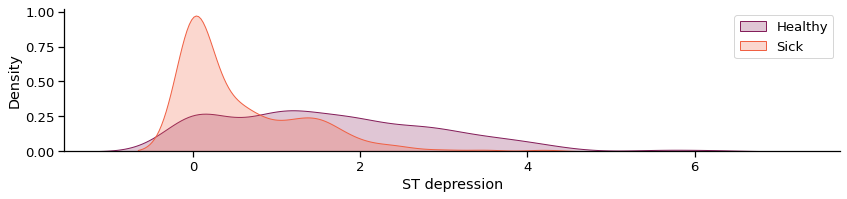

In [44]:
fig = sns.FacetGrid(df, hue="target",aspect=4, palette='rocket')
fig.map(sns.kdeplot,'ST depression',shade= True)
plt.legend(labels=['Healthy' , 'Sick'])

**point**:We can clearly see that in sick people we have a pick around 0. This can be a good indicator for this heart disease.

[Text(0, 0, 'upsloping'), Text(0, 0, 'flat'), Text(0, 0, 'downsloping')]

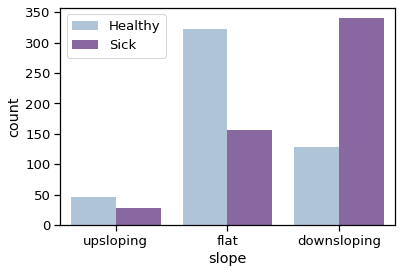

In [45]:
fig = sns.countplot(x = 'slope', data = df, hue = 'target', palette='BuPu')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'upsloping','flat', 'downsloping'])

**point**: many sick people have the value 3 (downsloping). So this should be taken more seriously.

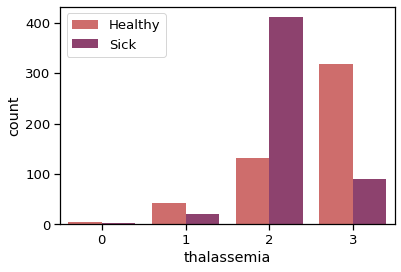

In [46]:
fig = sns.countplot(x = 'thalassemia', data = df, hue = 'target',palette='flare')
plt.legend(['Healthy', 'Sick'])

**point**:We can see many sick people have the kind 2 of Thalassemia.



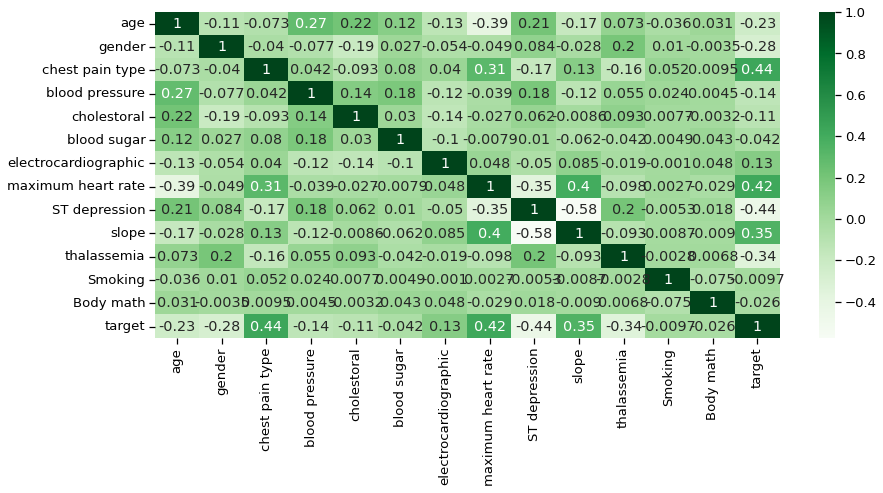

In [47]:
df.corr().style.background_gradient()
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
#RdYlGn

In [48]:
#plt.figure(figsize=(10,5))
#sns.countplot(x ='target', hue='chest pain type',data = df)
#plt.xticks([0,1],['Non heart dz','Heart dz'])
#plt.legend(labels=['typical angina','atypical angina','non angina pectoris','asymtomatic'])
# the people who have heart diseas is that have chest pain type (atypical angina / non angina pectoris / asymtomatic) more that the others that don,t have.

In [49]:
df.head()

,age,gender,chest pain type,blood pressure,cholestoral,blood sugar,electrocardiographic,maximum heart rate,ST depression,slope,thalassemia,Smoking,Body math,target
0,52,1,0,125.0,212.0,0,1,168,1.0,2,3,1,16.60,0
1,53,1,0,140.0,203.0,1,0,155,3.1,0,3,0,20.34,0
2,70,1,0,145.0,174.0,0,1,125,2.6,0,3,1,26.58,0
3,61,1,0,148.0,203.0,0,1,161,0.0,2,3,0,24.21,0
4,62,0,0,138.0,294.0,1,1,106,1.9,1,2,0,23.71,0


**6.machine learning model.**

In [50]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]


In [51]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X

array([[-0.26993232,  0.66137137, -0.91498708, ...,  1.08922135,
         1.16164766, -1.98644973],
       [-0.1596722 ,  0.66137137, -0.91498708, ...,  1.08922135,
        -0.86084622, -1.38835511],
       [ 1.71474993,  0.66137137, -0.91498708, ...,  1.08922135,
         1.16164766, -0.39046462],
       ...,
       [-0.82123295,  0.66137137, -0.91498708, ..., -0.52175437,
        -0.86084622, -0.63354051],
       [-0.49045257, -1.5120098 , -0.91498708, ..., -0.52175437,
         1.16164766, -0.51200257],
       [-0.04941207,  0.66137137, -0.91498708, ...,  1.08922135,
         1.16164766, -0.41125401]])

In [52]:
from sklearn.preprocessing import MinMaxScaler # we need to normalize/scale the data to get better results
print(X)
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
print(X)

[[-0.26993232  0.66137137 -0.91498708 ...  1.08922135  1.16164766
  -1.98644973]
 [-0.1596722   0.66137137 -0.91498708 ...  1.08922135 -0.86084622
  -1.38835511]
 [ 1.71474993  0.66137137 -0.91498708 ...  1.08922135  1.16164766
  -0.39046462]
 ...
 [-0.82123295  0.66137137 -0.91498708 ... -0.52175437 -0.86084622
  -0.63354051]
 [-0.49045257 -1.5120098  -0.91498708 ... -0.52175437  1.16164766
  -0.51200257]
 [-0.04941207  0.66137137 -0.91498708 ...  1.08922135  1.16164766
  -0.41125401]]
[[0.47916667 1.         0.         ... 1.         1.         0.05599587]
 [0.5        1.         0.         ... 1.         0.         0.16564224]
 [0.85416667 1.         0.         ... 1.         1.         0.34858164]
 ...
 [0.375      1.         0.         ... 0.66666667 0.         0.30401948]
 [0.4375     0.         0.         ... 0.66666667 1.         0.32630056]
 [0.52083333 1.         0.         ... 1.         1.         0.3447704 ]]


In [53]:

Y=Y.values.reshape(-1,1)
Y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25,shuffle=True,random_state=1) # split data into train and test.

In [55]:
regression=LogisticRegression(max_iter=1000,C=0.9) # we can select the maximum number of epochs / iterations ...try setting it to 10/20/30
regression.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.9, max_iter=1000)

In [56]:
print("regression train score is :",regression.score(X_train,Y_train))  # print the model score train
print("regression test score is :",regression.score(X_test,Y_test))     # print the model score test
print("regression classes are :",regression.classes_)                    # print the model num of classes.
print("regression num of iteration are :",regression.n_iter_)            # print the model num of iterations.

regression train score is : 0.825065274151436
regression test score is : 0.83984375
regression classes are : [0 1]
regression num of iteration are : [35]


In [57]:
y_pred=regression.predict(X_test)     # predict the test values.
print("predicted value:\n",y_pred)    # print the predicted value.
print("actual value:\n",Y_test.flatten())    #print the actual value.
Y_test.shape  # print the test shape.


predicted value:
 [0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1
 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0]
actual value:
 [0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0

(256, 1)

In [58]:
cm=confusion_matrix(Y_test,y_pred)  
print("confusion matrix: \n",cm)       #print confusion matrix

confusion matrix: 
 [[ 98  29]
 [ 12 117]]


In [59]:
from sklearn.metrics import classification_report
#Check precision, recall, f1-score
print(classification_report(Y_test,y_pred)) # print the values of presicion and recall and fi_score.

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       127
           1       0.80      0.91      0.85       129

    accuracy                           0.84       256
   macro avg       0.85      0.84      0.84       256
weighted avg       0.85      0.84      0.84       256



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[ 98  29]
 [ 12 117]]


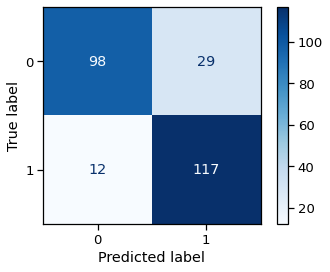

<Figure size 648x648 with 0 Axes>

In [60]:
dat = plot_confusion_matrix(regression, X_test, Y_test,cmap=plt.cm.Blues)
plt.figure(figsize=(9,9))
print(dat.confusion_matrix)  # print  the value of the confusion matrix

plt.show();    #

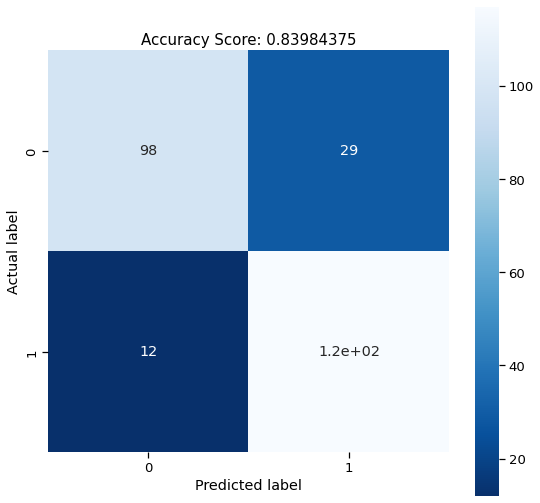

In [61]:
cm = metrics.confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, square = True, cmap = 'Blues_r');  # create 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(regression.score(X_test,Y_test))
plt.title(all_sample_title, size = 15);